Importing libraries

In [1]:
import numpy as np    #to deal with arrays
import pandas as pd   #to make dataframe
import requests       #to get data from API
import matplotlib.pyplot as plt    #to create plots

Main Model

In [2]:
class ChronoWarp:
    #Using NASA Exoplanet Archive API
    def fetch_exoplanet_data(self):
        url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync"
        query = {
            "query": "SELECT pl_orbper, pl_orbsmax, pl_bmasse, pl_rade FROM ps WHERE pl_orbsmax IS NOT NULL AND pl_orbper IS NOT NULL AND pl_bmasse IS NOT NULL AND pl_rade IS NOT NULL",
            "format": "json"
        }

        response = requests.get(url, params=query)
        data = response.json()

        return pd.DataFrame(data)



    #Generating our data
    def generate_synthetic_data(self, exoplanet_data):
        G = 6.67430e-11     #Gravitational constant (unit: m^3 kg^-1 s^-2)
        M_sun = 1.989e30    #Mass of the Sun (unit: kg)
        AU = 1.496e11       #Astronomical Unit (unit: m)
        day_to_sec = 86400  #No of seconds in a day
        c = 3.0e8           #Speed of light (unit: m/s)

        #Convert planets' orbital period from days to seconds for further calculation
        exoplanet_data['pl_orbper_sec'] = exoplanet_data['pl_orbper'] * day_to_sec

        #Calculate orbital velocity using v = 2 * pi * a / T
        #'pl_orbsmax' represents the semi-major axis of the planet's orbit
        #It is the average distance between the planet and its star(measured in astronomical units (AU))
        #AU is a standard unit of measurement for distances in space
        #One AU is approximately the average distance between the Earth and the Sun
        exoplanet_data['velocity'] = 2 * np.pi * exoplanet_data['pl_orbsmax'] * AU / exoplanet_data['pl_orbper_sec']

        #Calculate gravitational field strength at the surface of the planet using g = G * M * m/ R^2
        #'pl_bmasse' represents the planet mass
        #'pl_rade' represents the planet radius
        exoplanet_data['gravity'] = G * exoplanet_data['pl_bmasse'] * M_sun / (exoplanet_data['pl_rade']**2 * AU**2)

        #Normalize velocity as a fraction of the speed of light (c)
        exoplanet_data['velocity'] = exoplanet_data['velocity'] / c

        #Time dilation approximation using the relativistic formula
        exoplanet_data['time_dilation'] = np.sqrt(1 - exoplanet_data['velocity']**2) / (1 + exoplanet_data['gravity'] / 1e12)

        return exoplanet_data[['velocity', 'gravity', 'time_dilation']]



    def retrieve_my_data(self):
        #Retrieving the data from API
        exoplanet_data = self.fetch_exoplanet_data()
        #print(exoplanet_data.head())

        #Generate synthetic data
        synthetic_data = self.generate_synthetic_data(exoplanet_data)
        #print(synthetic_data.head())

        velocity_values = synthetic_data['velocity'].values
        gravity_values = synthetic_data['gravity'].values
        predictions = synthetic_data['time_dilation'].values

        return velocity_values, gravity_values, predictions



    def plot_velocity_based_TD(self):
        velocity_values, gravity_values, predictions = self.retrieve_my_data()

        plt.figure(figsize=(8, 4))
        plt.plot(velocity_values, predictions, label='Time Dilation vs Velocity')
        plt.xlabel('Velocity (as a fraction of the speed of light)')
        plt.ylabel('Predicted Time Dilation')
        plt.title('Time Dilation: Time Slows Down with Increasing Velocity')
        plt.grid(True)
        plt.legend()
        plt.show()



    def plot_gravity_based_TD(self):
        velocity_values, gravity_values, predictions = self.retrieve_my_data()

        plt.figure(figsize=(8, 4))
        plt.plot(gravity_values, predictions, label='Time Dilation vs Gravity', color='orange')
        plt.xlabel('Gravitational Field Strength (arbitrary units)')
        plt.ylabel('Predicted Time Dilation')
        plt.title('Time Dilation: Time Slows Down with Increasing Gravity')
        plt.grid(True)
        plt.legend()
        plt.show()



    def predict_time_dilation(self, v, g):
        #Time dilation approximation using the relativistic formula
        predicted_time_dilation = np.sqrt(1 - v**2) / (1 + g / 1e12)

        return predicted_time_dilation

In [3]:
model = ChronoWarp()

Predicting Time Dilation

In [4]:
try:
    velocity = float(input("Enter velocity (as a fraction of the speed of light, e.g., 0.5): "))
    gravity = float(input("Enter gravitational field strength (in arbitrary units, e.g., 50): "))
    prediction = model.predict_time_dilation(velocity, gravity)
    print(f"Predicted Time Dilation: {prediction:.4f}")
except ValueError:
    print("Invalid input, please enter numeric values.")

Enter velocity (as a fraction of the speed of light, e.g., 0.5): 0.7
Enter gravitational field strength (in arbitrary units, e.g., 50): 40
Predicted Time Dilation: 0.7141


Visualizing

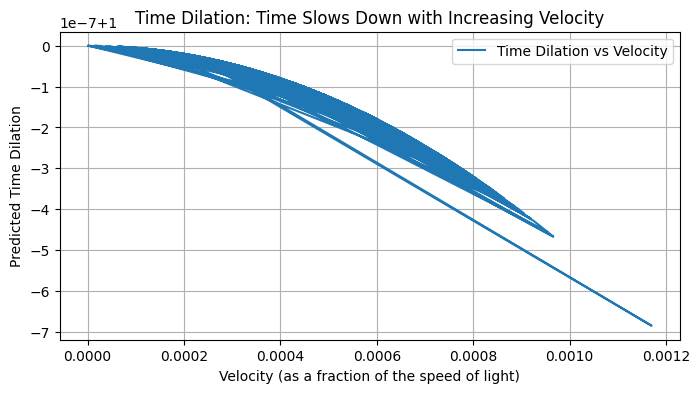

In [ ]:
#Special Relativity (Velocity-Based Time Dilation):
#Objects moving at high speeds causes their clocks to tick more slowly compared to those on the Earth's surface
model.plot_velocity_based_TD()

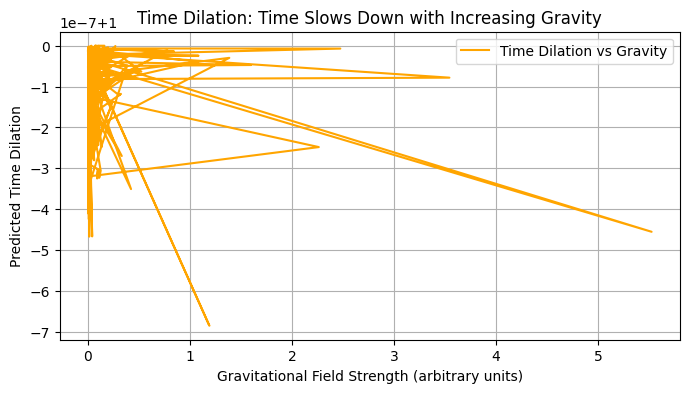

In [ ]:
#General Relativity (Gravity-Based Time Dilation):
#Places where the gravitational field is stronger causes the clocks to tick slower compared to those on the Earth's surface
model.plot_gravity_based_TD()

Scenario Explorer

In [ ]:
class ChronoWarp_Explorer:
    def blackhole_TD(self):
        G = 6.67430e-11  #Gravitational constant in m^3 kg^-1 s^-2
        c = 3e8  #Speed of light in m/s
        M = 5.972e30 * 4e6  #Mass of the black hole in kg (4 million times the mass of the Sun)

        #Range of distances from the black hole center (from the event horizon outward)
        r_s = 2 * G * M / c**2  #Schwarzschild radius (event horizon)
        r = np.linspace(r_s, 10 * r_s, 1000)

        #Calculate time dilation factor
        time_dilation_factor = np.sqrt(1 - 2 * G * M / (c**2 * r))

        #Plotting
        plt.figure(figsize=(8, 4))
        plt.plot(r / r_s, time_dilation_factor, color='red', linewidth=2)
        plt.ylim(0, 1)
        plt.xlim(1, 10)
        plt.xlabel('Distance from Black Hole (in terms of Schwarzschild Radii)')
        plt.ylabel('Time Dilation Factor')
        plt.title('Extreme Time Dilation Near a Black Hole')
        plt.grid(True)

        #Add event horizon annotation
        plt.axvline(x=1, color='black', linestyle='--')
        plt.text(1.05, 0.5, 'Event Horizon\n(Schwarzschild Radius)',
                 verticalalignment='center', fontsize=10, color='black')

        plt.show()



    def extreme_velocity_TD(self):
        #Define a range of velocities as a fraction of the speed of light
        c = 3e8  #Speed of light in m/s
        velocities = np.linspace(0, 0.99 * c, 500)  #Up to 99% of the speed of light

        #Calculate the Lorentz factor (time dilation factor) for each velocity
        gamma = 1 / np.sqrt(1 - (velocities/c)**2)

        plt.figure(figsize=(8, 4))
        plt.plot(velocities / c, gamma, color='blue', linewidth=2)
        plt.xlabel('Velocity (as a fraction of the speed of light, c)')
        plt.ylabel('Time Dilation Factor (Lorentz factor, γ)')
        plt.title('Time Dilation at Relativistic Speeds')
        plt.grid(True)

        #Highlight the point at 0.9c
        v_90c = 0.9 * c
        gamma_90c = 1 / np.sqrt(1 - (0.9**2))
        plt.scatter([0.9], [gamma_90c], color='red', s=100, zorder=5)
        plt.text(0.9, gamma_90c + 1, f'v = 0.9c\nγ ≈ {gamma_90c:.2f}',
                 horizontalalignment='center', color='red', fontsize=12)

        plt.show()

In [ ]:
model = ChronoWarp_Explorer()

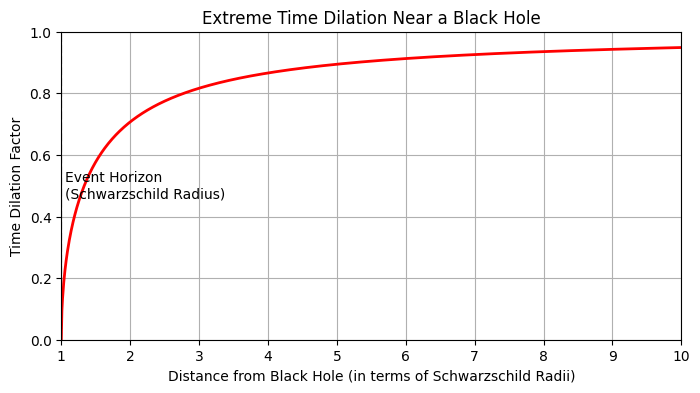

In [ ]:
#Time dilation becomes significant near a black hole due to its intense gravitational field.
#As you approach the event horizon (the boundary beyond which nothing can escape the black hole), time dilation increases dramatically.
#For an observer far away from the black hole, it appears as if time is nearly frozen for objects near the event horizon.
model.blackhole_TD()

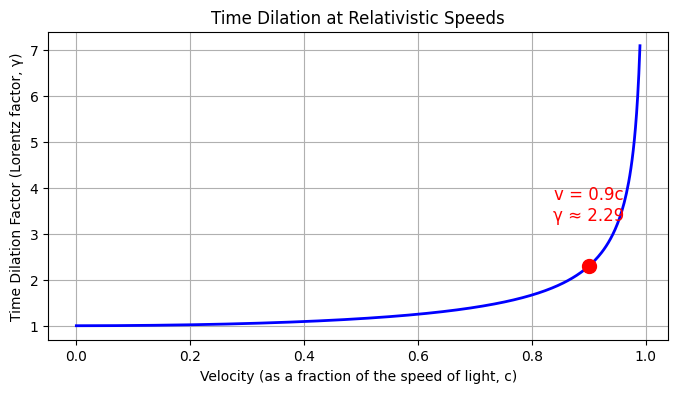

In [ ]:
#Time dilation at velocity that is close to the speed of light
#For v=0.9c, this factor becomes significant, meaning that time for the moving object slows down dramatically compared to someone at rest.
model.extreme_velocity_TD()